<a href="https://colab.research.google.com/github/vaidande/Cotton-Disease-Prediction-InceptionResNetV2-Xception-InceptionV3/blob/main/Cotton_Disease_Prediction_InceptionResNetV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [71]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
from glob import glob

In [64]:
inceptionresnet = InceptionResNetV2(input_shape=(224, 224, 3), weights='imagenet', include_top=False)

In [68]:
#don't train existing weights.
for layer in inceptionresnet.layers:
  layer.trainable = False

In [69]:
#useful for getting no. of output classes.
folders = glob('/content/gdrive/MyDrive/kaggle_dataset/Cotton Disease/train/*')

In [72]:
x = MaxPooling2D()(inceptionresnet.output)
x = Flatten()(x)
x = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=inceptionresnet.input, outputs=x)

In [73]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_297 (Conv2D)             (None, 111, 111, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_297 (BatchN (None, 111, 111, 32) 96          conv2d_297[0][0]                 
__________________________________________________________________________________________________
activation_297 (Activation)     (None, 111, 111, 32) 0           batch_normalization_297[0][0]    
____________________________________________________________________________________________

In [74]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [51]:
#Data Augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [75]:
training_set = train_datagen.flow_from_directory('/content/gdrive/MyDrive/kaggle_dataset/Cotton Disease/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
test_set = test_datagen.flow_from_directory('/content/gdrive/MyDrive/kaggle_dataset/Cotton Disease/val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1951 images belonging to 4 classes.
Found 324 images belonging to 4 classes.


In [76]:
metric = 'val_accuracy'
checkpoint = ModelCheckpoint("/content/gdrive/MyDrive/kaggle_dataset/Cotton Disease/cottondisease_inceptionresnetv2.h5", monitor = metric, save_best_only=True, mode = 'auto', verbose = 1)

In [77]:
r = model.fit_generator(training_set,
                        validation_data=test_set,
                        epochs=20, callbacks = [checkpoint])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
61/61 [==============================] - 49s 651ms/step - loss: 1.6743 - accuracy: 0.5710 - val_loss: 0.5368 - val_accuracy: 0.8056

Epoch 00001: val_accuracy improved from -inf to 0.80556, saving model to /content/gdrive/MyDrive/kaggle_dataset/Cotton Disease/cottondisease_inceptionresnetv2.h5
Epoch 2/20
61/61 [==============================] - 38s 615ms/step - loss: 0.4451 - accuracy: 0.8362 - val_loss: 0.4763 - val_accuracy: 0.8457

Epoch 00002: val_accuracy improved from 0.80556 to 0.84568, saving model to /content/gdrive/MyDrive/kaggle_dataset/Cotton Disease/cottondisease_inceptionresnetv2.h5
Epoch 3/20
61/61 [==============================] - 37s 611ms/step - loss: 0.3508 - accuracy: 0.8782 - val_loss: 0.3549 - val_accuracy: 0.8765

Epoch 00003: val_accuracy improved from 0.84568 to 0.87654, saving model to /content/gdrive/MyDrive/kaggle_dataset/Cotton Disease/cottondisease_inceptionresnetv2.h5
Epoch 4/20
61/61 [==============================] - 38s 618ms/step - loss: 0

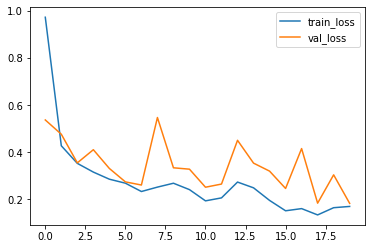

<Figure size 432x288 with 0 Axes>

In [80]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train_loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.savefig('Loss_ValLoss')

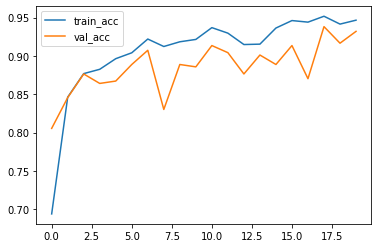

<Figure size 432x288 with 0 Axes>

In [81]:
plt.plot(r.history['accuracy'], label='train_acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
plt.savefig('Acc_ValAcc')

In [58]:
from tensorflow.keras.models import load_model
model.save('/content/gdrive/MyDrive/kaggle_dataset/Cotton Disease/cottondisease_inceptionresnetv2.h5')

In [59]:
x=image.load_img('/content/gdrive/MyDrive/kaggle_dataset/Cotton Disease/test/diseased cotton leaf/dis_leaf (248).jpg',target_size=(224,224))

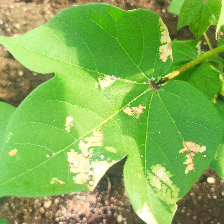

In [60]:
x

In [61]:
test_img = image.img_to_array(x)
test_img = test_img/255
test_img = np.expand_dims(test_img, axis = 0)
result = model.predict(test_img)

In [62]:
a=np.argmax(result, axis=1)

In [63]:
if a==0:
  print("The Leaf is diseased Cotton Leaf")
elif a==1:
  print("The Leaf is diseased Cotton Plant")
elif a==2:
  print("The Leaf is fresh Cotton Leaf")
else:
  print("The Leaf is fresh Cotton Plant")

The Leaf is diseased Cotton Leaf
